In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
%matplotlib inline

In [ ]:
df = pd.read_csv(r'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df = pd.read_csv(r'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', sep=',',names=["Cultivar","Alcohol","Malic","Ash","Alkalinity","Magnesium","Phenols","Flavanoids","Nonflav","Proanthocyan","Color","Hue","OD280","Proline"])
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.head()

,Cultivar,Alcohol,Malic,Ash,Alkalinity,Magnesium,Phenols,Flavanoids,Nonflav,Proanthocyan,Color,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
attributes = df.columns
features = attributes[1:]
classification = attributes[0]
attributes

Index(['Cultivar', 'Alcohol', 'Malic', 'Ash', 'Alkalinity', 'Magnesium',
       'Phenols', 'Flavanoids', 'Nonflav', 'Proanthocyan', 'Color', 'Hue',
       'OD280', 'Proline'],
      dtype='object')

In [ ]:
NaN_data_flag = df.isnull().any()

Làm sạch data

In [ ]:
if NaN_data_flag.any():
    print("Some records have NaN values. These will be removed...\n")
    before_rows, before_cols = df.shape
    df = df.dropna()
    after_rows, after_cols = df.shape
    print("Dropped", after_rows - before_rows, "records. Cleaned dataframe has", after_rows, "records.\n")
else:
    print("Không có NaN values..\n")
    

Không có NaN values..



Thống kê mô tả


In [ ]:
df.describe()

,Cultivar,Alcohol,Malic,Ash,Alkalinity,Magnesium,Phenols,Flavanoids,Nonflav,Proanthocyan,Color,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Research Questions
--Có thể dự đoán một loại rượu bằng cách phân tích các đặc tính hóa học của nó không?
--Những hoạt tính hóa học nào liên quan chặt chẽ hơn đến đặc điểm
 rượu vang?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cultivar      178 non-null    int64  
 1   Alcohol       178 non-null    float64
 2   Malic         178 non-null    float64
 3   Ash           178 non-null    float64
 4   Alkalinity    178 non-null    float64
 5   Magnesium     178 non-null    int64  
 6   Phenols       178 non-null    float64
 7   Flavanoids    178 non-null    float64
 8   Nonflav       178 non-null    float64
 9   Proanthocyan  178 non-null    float64
 10  Color         178 non-null    float64
 11  Hue           178 non-null    float64
 12  OD280         178 non-null    float64
 13  Proline       178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<Axes: ylabel='Cultivar'>

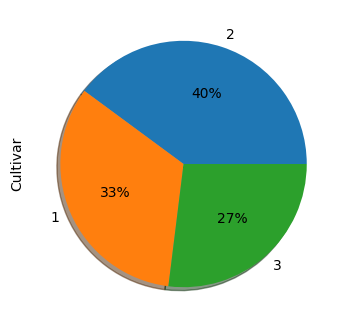

In [ ]:
region_counts = df['Cultivar'].value_counts()
explode = (0, 0.1, 0)
region_counts.plot(kind='pie',autopct='%.0f%%', shadow=True, figsize=(4,4), radius=1.0)


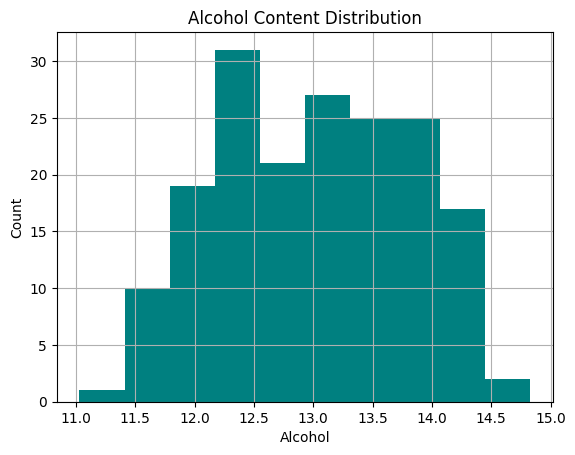

In [ ]:
hist_quality = df['Alcohol']
plt.hist(hist_quality, 10, facecolor='teal')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.title('Alcohol Content Distribution')
plt.grid(True)
plt.show()


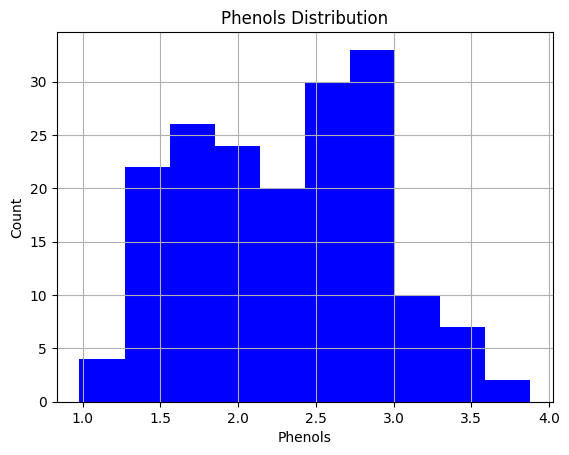

In [ ]:
hist_fixed = df['Phenols']
plt.hist(hist_fixed, 10,  facecolor='blue')
plt.xlabel('Phenols')
plt.ylabel('Count')
plt.title('Phenols Distribution')
plt.grid(True)
plt.show()


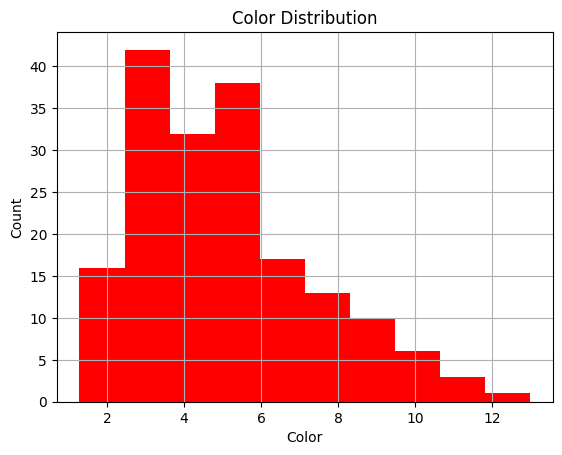

In [ ]:
hist_volatile = df['Color']
plt.hist(hist_volatile, 10,  facecolor='red')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Color Distribution')
plt.grid(True)
plt.show()

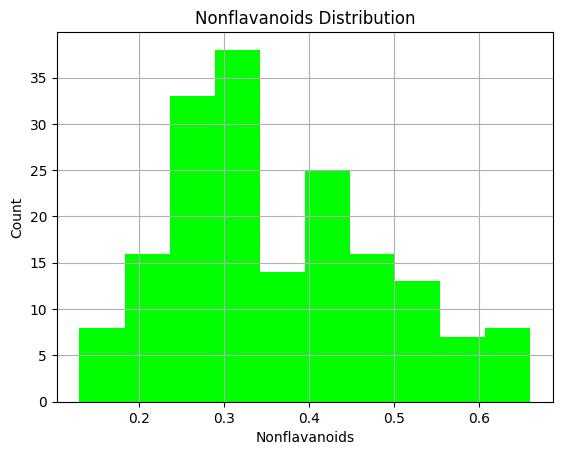

In [ ]:
hist_citric = df['Nonflav']
plt.hist(hist_citric, 10,facecolor='lime')
plt.xlabel('Nonflavanoids')
plt.ylabel('Count')
plt.title('Nonflavanoids Distribution')
plt.grid(True)
plt.show()

## Classification


In [ ]:
classification_data = df.copy()
label_mapping = {1:'Cultivar1', 2:'Cultivar2', 3:'Cultivar3'}
classification_data['Cultivar_Label'] = classification_data['Cultivar'].map(label_mapping)
classification_data.head()

,Cultivar,Alcohol,Malic,Ash,Alkalinity,Magnesium,Phenols,Flavanoids,Nonflav,Proanthocyan,Color,Hue,OD280,Proline,Cultivar_Label
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Cultivar1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Cultivar1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Cultivar1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Cultivar1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Cultivar1


khung dữ liệu gốc được tạo và một cột bổ sung được thêm vào: Cultivar_Label. Đây chỉ là ánh xạ của biến Cultivar nhận giá trị 1, 2 hoặc 3 vào nhãn nhận giá trị Cultivar1, Cultivar2 hoặc Cultivar3. Tất cả các thuộc tính hóa học sẽ được sử dụng  (X), Cultivar_Label sẽ được sử dụng làm mục tiêu (Y).

In [ ]:
# Target  in Y
Y = classification_data[['Cultivar_Label']].copy()

# Training  in X
features = ['Alcohol', 'Malic', 'Ash', 'Alkalinity', 'Magnesium', 'Phenols', 
            'Flavanoids', 'Nonflav', 'Proanthocyan', 'Color', 'Hue', 'OD280', 'Proline']
X = classification_data[features].copy()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)

In [ ]:
quality_classifier = DecisionTreeClassifier(max_leaf_nodes = 15, random_state = 42)
quality_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=42)

In [ ]:
# Testing
predictions = quality_classifier.predict(X_test)
predictions[:10]


array(['Cultivar1', 'Cultivar1', 'Cultivar3', 'Cultivar1', 'Cultivar2',
       'Cultivar1', 'Cultivar2', 'Cultivar3', 'Cultivar2', 'Cultivar3'],
      dtype=object)

In [ ]:
percentages = Y_test['Cultivar_Label'].value_counts(normalize=True)
percentages

Cultivar2    0.375000
Cultivar1    0.361111
Cultivar3    0.263889
Name: Cultivar_Label, dtype: float64

In [ ]:
# đo chỉ số tin cậy
accuracy_score(y_true = Y_test, y_pred = predictions)

0.9444444444444444

## Classification Analysis
cho thấy độ chính xác xấp xỉ 94%. Đây là một kết quả rất tốt, đặc biệt khi tính đến việc không có kỹ thuật tính năng nào được triển khai.

# Clustering
 phương pháp kmeans nhóm dữ liệu thành các cụm dựa trên độ tương tự của mẫu.  xem liệu các mẫu từ cùng một cụm giống cây trồng có giống nhau hay không, 
 

In [ ]:
features = ['Alcohol', 'Malic', 'Ash', 'Alkalinity', 'Magnesium', 'Phenols', 
            'Flavanoids', 'Nonflav', 'Proanthocyan', 'Color', 'Hue', 'OD280', 'Proline']
X_cluster = StandardScaler().fit_transform(df[features])

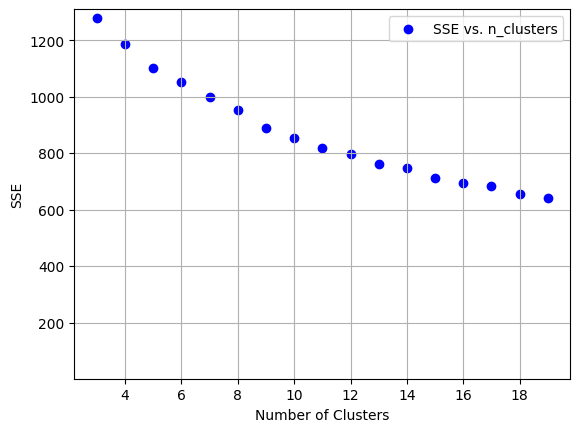

In [ ]:
# tìm số cluster
SSE_data =[]
for n in range(3, 20):
    # Perform the clustering
    kmeans = KMeans(n_clusters = n)
    model = kmeans.fit(X_cluster)
    SSE_data.append(model.inertia_)
    
#  Các giá trị SSE để tìm số cụm tốt nhất
SSE_series = pd.Series(SSE_data)
x = np.arange(3., 20., 1.0)
plt.scatter(x, SSE_series, c="b", marker='o', label="SSE vs. n_clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.legend(loc=1)
plt.ylim(ymin=1)
plt.grid()
plt.show()

Từ đồ thị ở trên cho thấy SSE (Tổng lỗi bình phương) là một hàm của tổng số cụm, có vẻ như bạn nên chọn từ 10 đến 12 cụm. do đó ta sẽ thử phân tích 11 cụm


In [ ]:
# Clustering
kmeans = KMeans(n_clusters = 11)
model = kmeans.fit(X_cluster)
print("Model\n", model)

# phân bố ra
centers = model.cluster_centers_
centers.round(2)

Model
 KMeans(n_clusters=11)


array([[ 0.62, -0.39,  1.12,  0.07,  0.66,  0.73,  0.78, -0.27,  0.2 ,
        -0.1 ,  0.79,  0.68,  0.93],
       [-0.79,  0.15, -0.55,  0.58, -0.73,  0.03,  0.13, -0.05,  0.  ,
        -1.08, -0.13,  0.61, -1.02],
       [ 0.53,  0.7 ,  0.48,  0.77,  0.2 , -0.82, -1.1 ,  0.48, -0.3 ,
         1.96, -1.47, -1.41, -0.38],
       [ 1.08, -0.07, -0.24, -1.07,  0.47,  0.82,  0.87, -0.85,  0.42,
         0.07,  0.11,  1.06,  0.83],
       [-0.44,  0.1 , -0.34, -0.08,  0.24, -1.16, -1.1 ,  0.21, -1.07,
        -0.04, -0.84, -1.18, -0.34],
       [-1.24, -0.61,  0.25,  0.71, -0.84, -0.66, -0.33,  1.15, -0.3 ,
        -0.98,  0.9 , -0.08, -0.75],
       [ 1.12, -0.48,  0.17, -0.96,  0.28,  1.24,  1.32, -0.7 ,  1.24,
         0.73,  0.61,  0.57,  1.83],
       [-0.82, -0.99, -1.46, -0.79,  3.51, -0.34, -0.23, -0.74,  2.2 ,
        -0.91,  0.92,  0.08,  0.17],
       [ 0.14,  1.59,  0.37,  0.73, -0.46, -0.95, -1.39,  1.41, -1.06,
         0.33, -0.88, -1.13, -0.46],
       [-1.36, -0.27,  0.11,

In [ ]:
# Determines cluster for each sample
predictedCluster = kmeans.predict(X_cluster)
predictedCluster

array([ 3,  3,  6,  6,  0,  6,  3,  0,  3,  3,  6,  3,  6,  6,  6,  0,  0,
        0,  6,  3,  3,  0,  3,  0,  0,  0,  0,  3,  0,  3,  0,  6,  0,  0,
        0,  0,  0,  0, 10,  3,  3,  3,  3,  3,  3,  3,  3,  3,  6,  6,  6,
        6,  6,  0,  3,  6,  3,  0,  6, 10,  5,  4, 10,  9,  5,  9, 10, 10,
        4,  7,  4,  0,  1,  0,  9, 10, 10,  4,  7,  1, 10, 10,  5,  8,  9,
       10,  5,  5,  5,  5,  5,  5,  5,  1,  9,  7,  4, 10,  9,  9, 10, 10,
        1,  1,  1,  5,  1,  5,  1,  9,  9,  1,  5,  5,  1,  5,  1,  1,  4,
        1,  9,  9,  1,  1,  9,  1,  1,  5,  1,  1,  4,  4,  4,  4,  4,  4,
        8,  8,  8,  8,  8,  4,  8,  8,  4,  4,  8,  8,  2,  2,  2,  2,  2,
        2,  4,  8,  2,  8,  2,  2,  8,  8,  8,  4,  2,  8,  2,  2,  2,  2,
        4,  2,  2,  8,  2,  2,  2,  2], dtype=int32)

Plotting centroids with a parallel plot

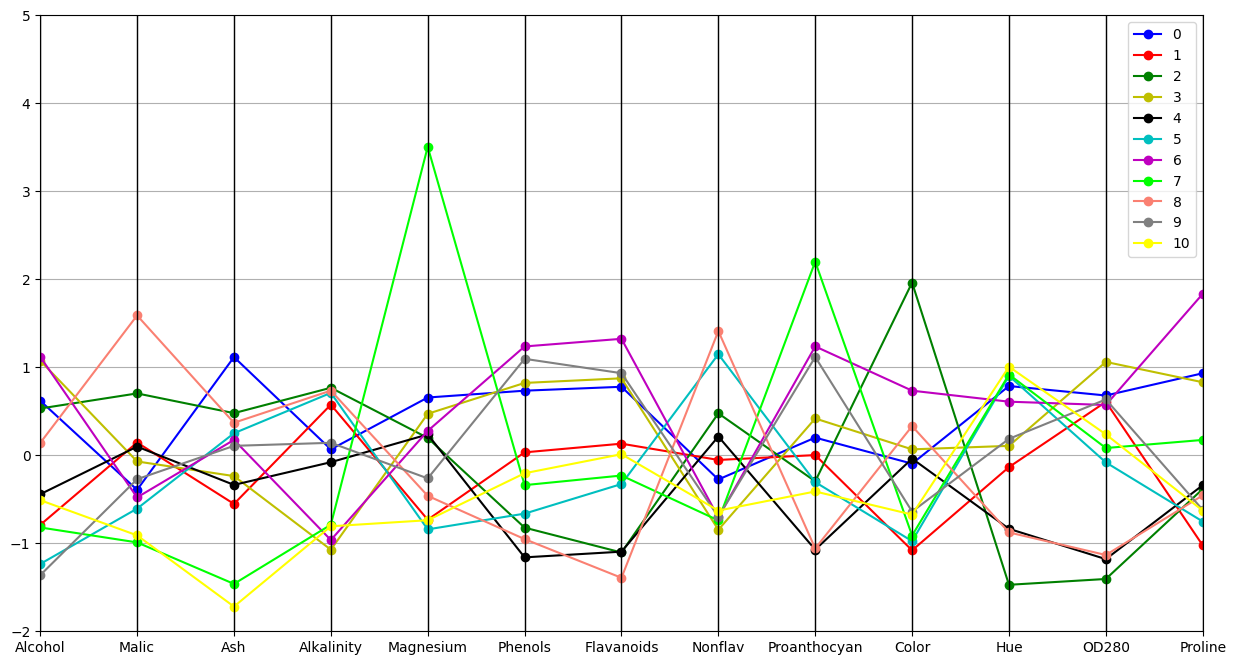

In [ ]:
#Plots
#  column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# khung dữ liệu gấu trúc để vẽ đồ thị
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

# Parallel Plots

def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k', 'c', 'm', 'lime', 'salmon', 'grey','yellow']), None, len(data)))
    fig = plt.figure(figsize=(15,8)).gca().axes.set_ylim([-2,+5])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')
    plt.savefig('FeaturePlot.png')
    
P = pd_centers(features, centers)
parallel_plot(P)

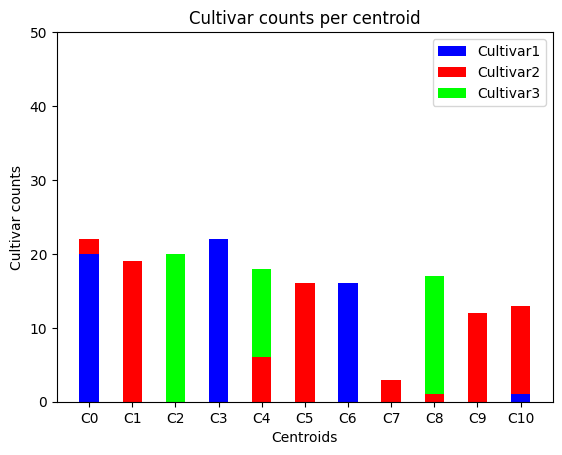

In [ ]:
#Đại diện giống cây trồng theo cụm
cultivar1Clusters = predictedCluster[df['Cultivar'] == 1]
cultivar2Clusters = predictedCluster[df['Cultivar'] == 2]
cultivar3Clusters = predictedCluster[df['Cultivar'] == 3]

totClusters = 11
cultivar1Counts = []
cultivar2Counts = []
cultivar3Counts = []
for i in range(totClusters):
    cultivar1Counts.append(np.count_nonzero(cultivar1Clusters == i))
    cultivar2Counts.append(np.count_nonzero(cultivar2Clusters == i))
    cultivar3Counts.append(np.count_nonzero(cultivar3Clusters == i))
    
# Vẽ biểu đồ phân phối các mẫu cây trồng trên mỗi centroid
ind = np.arange(totClusters)    
width = 0.45                    
cult1Pluscult2 = [sum(x) for x in zip(cultivar1Counts, cultivar2Counts)]

p1 = plt.bar(ind, cultivar1Counts, width, color='b')
p2 = plt.bar(ind, cultivar2Counts, width, bottom = cultivar1Counts, color='r')
p3 = plt.bar(ind, cultivar3Counts, width, bottom = cult1Pluscult2, color='lime')

plt.ylabel('Cultivar counts')
plt.xlabel('Centroids')
plt.title('Cultivar counts per centroid')
plt.xticks(ind, ('C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'))
plt.yticks(np.arange(0, 51, 10))
plt.legend((p1[0], p2[0], p3[0]), ('Cultivar1', 'Cultivar2', 'Cultivar3'))
plt.show()

In [ ]:
df['Cultivar1'] = df['Cultivar'] == 1
df['Cultivar2'] = df['Cultivar'] == 2
df['Cultivar3'] = df['Cultivar'] == 3
corrVariables = ['Cultivar1', 'Cultivar2', 'Cultivar3', 'Alcohol', 'Magnesium',
                'Phenols', 'Flavanoids', 'Nonflav', 'Ash', 'Alkalinity', 'Color', 'Hue', 
                 'Proanthocyan', 'OD280', 'Malic', 'Proline']
cultivars_df = df[corrVariables]


# tương quan
corr = cultivars_df.corr().round(2)
corr = corr[['Cultivar1', 'Cultivar2', 'Cultivar3']]
cultivarCorr = corr.drop(['Cultivar1', 'Cultivar2', 'Cultivar3'], axis = 0)
cultivarCorr

,Cultivar1,Cultivar2,Cultivar3
Alcohol,0.65,-0.73,0.11
Magnesium,0.33,-0.30,-0.02
Phenols,0.61,-0.05,-0.60
Flavanoids,0.67,0.04,-0.76
Nonflav,-0.41,0.01,0.42
Ash,0.23,-0.36,0.16
Alkalinity,-0.52,0.18,0.35
Color,0.14,-0.69,0.61
Hue,0.32,0.35,-0.73
Proanthocyan,0.38,0.06,-0.47
